# HR Data Anlaysis

Human Resource (HR) Data of a Multi-national Corporation (MNC) - 2 Million Records </p>
This dataset contains HR information for employees of a multinational corporation (MNC). It includes 2 Million employee records with details about personal identifiers, job-related attributes, performance, employment status, and salary information.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitgrewal/hr-data-mnc")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/hr-data-mnc


In [ ]:
import os

print(os.listdir(path))


['HR_Data_MNC_Data Science Lovers.csv']


In [ ]:
import pandas as pd
import os

file_name = os.listdir(path)[0]
file_path = os.path.join(path, file_name)

# Load into pandas
df = pd.read_csv(file_path)

print("Data loaded into DataFrame.")


Data loaded into DataFrame.


In [ ]:
df.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [ ]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


In [ ]:
# Removing unwamnted column from the dataframe

df.drop( 'Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# Change the data-type of Date column (from object to datetime64)

df['Hire_Date'] = pd.to_datetime( df['Hire_Date'] )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Employee_ID         object        
 1   Full_Name           object        
 2   Department          object        
 3   Job_Title           object        
 4   Hire_Date           datetime64[ns]
 5   Location            object        
 6   Performance_Rating  int64         
 7   Experience_Years    int64         
 8   Status              object        
 9   Work_Mode           object        
 10  Salary_INR          int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 167.8+ MB


In [ ]:
# What is the range of the performance rating scale, from start to end?

df['Performance_Rating'].unique()

array([5, 2, 1, 4, 3])

In [ ]:
# How many people are in each rating group?
df['Performance_Rating'].value_counts()

,count
Performance_Rating,
4,400529
2,400174
3,399814
1,399756
5,399727


In [ ]:
# What is the average performance rating?
df['Performance_Rating'].mean()

np.float64(3.0001485)

In [ ]:
# How many distinct experience year groups are in the data?
df['Experience_Years'].nunique()

16

In [ ]:
# What are the distinct experience year groups in the dataset?
df['Experience_Years'].unique()

array([14,  7,  2,  1,  0,  4,  9,  5,  6,  8,  3, 10, 11, 12, 13, 15])

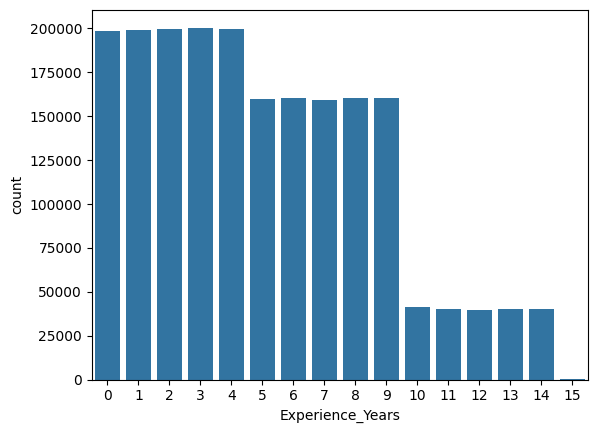

In [ ]:
sns.countplot( x = 'Experience_Years', data = df)

plt.show()

In [ ]:
# How many people are in each experience year group?
df['Experience_Years'].value_counts()

,count
Experience_Years,
3,200522
2,199924
4,199866
1,199162
0,198775
6,160410
9,160223
8,160212
5,160112


In [ ]:
# Consider the columns having data-type 'Object' only

df.select_dtypes( include = 'object')

,Employee_ID,Full_Name,Department,Job_Title,Location,Status,Work_Mode
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,"Isaacland, Denmark",Resigned,On-site
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,"Anthonyside, Costa Rica",Active,On-site
2,EMP0000003,Alyssa Martinez,HR,HR Manager,"Port Christinaport, Saudi Arabia",Active,On-site
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,"Port Shelbychester, Antigua and Barbuda",Active,On-site
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,"Lake Kimberly, Palestinian Territory",Active,On-site
...,...,...,...,...,...,...,...
1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,"Casefurt, Serbia",Active,Remote
1999996,EMP1999997,Tracey Smith,IT,Software Engineer,"Dannyport, Kuwait",Active,On-site
1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,"Craighaven, Nigeria",Active,Remote
1999998,EMP1999999,Michael Roberson,IT,Software Engineer,"Jonathanmouth, Djibouti",Retired,On-site


In [ ]:
# Consider the columns having data-type 'Number' only

df.select_dtypes( include = 'number')

,Performance_Rating,Experience_Years,Salary_INR
0,5,14,1585363
1,2,7,847686
2,1,2,1430084
3,1,1,990689
4,5,0,535082
...,...,...,...
1999995,3,14,657648
1999996,3,4,1030109
1999997,5,1,1313085
1999998,4,2,1479727


## Q1 What is the distribution of Employee Status (Active, Resigned, Retired, Terminated) ?

In [ ]:
status = df['Status'].value_counts()
status

,count
Status,
Active,1401558
Resigned,398660
Retired,99912
Terminated,99870


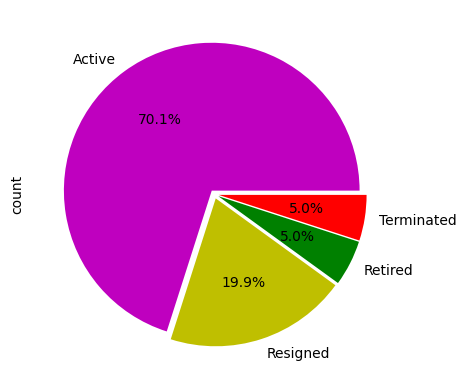

In [ ]:
status.plot( kind = 'pie' , colors = 'mygr', autopct= '%1.1f%%', explode=(0.03,0.03,0.03,0.03))

plt.show()

## Q2 What is the distribution of work modes (On-site, Remote) ?

In [ ]:
work = df['Work_Mode'].value_counts()
work

,count
Work_Mode,
On-site,1199109
Remote,800891


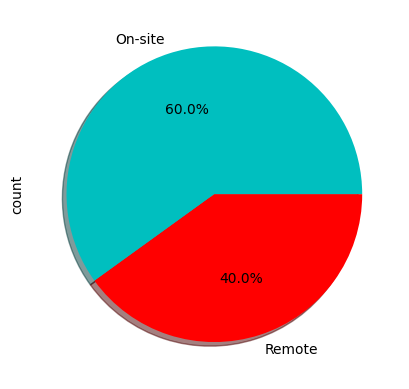

In [ ]:
work.plot( kind = 'pie', colors = 'cr', autopct= '%1.1f%%', shadow = True)

plt.show()

## Q3 How many employees are there in each department?

In [ ]:
department = df['Department'].value_counts()
department

,count
Department,
IT,601042
Sales,400031
Operations,300095
Marketing,240081
Finance,199873
HR,159119
R&D,99759


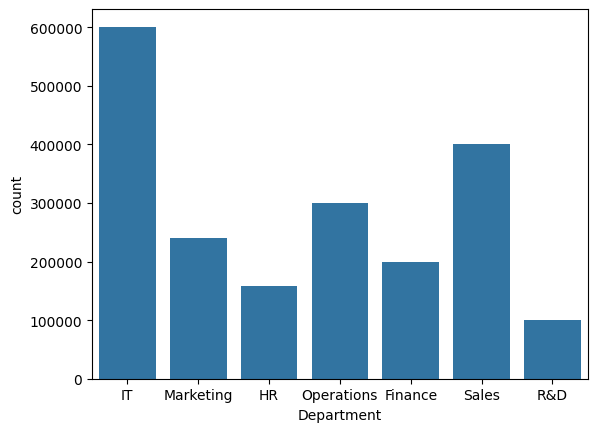

In [ ]:
sns.countplot( x = 'Department', data = df )

plt.show()

In [ ]:
# What percentage of workers are remote in each department?
df.groupby('Department')['Work_Mode'].apply(lambda x: (x == 'Remote').mean() * 100)

,Work_Mode
Department,
Finance,39.884327
HR,40.212671
IT,40.067083
Marketing,40.127290
Operations,39.950349
R&D,40.081597
Sales,40.035647


In [ ]:
job_title = df['Job_Title'].value_counts()
job_title

,count
Job_Title,
Software Engineer,300358
Sales Executive,199982
Operations Executive,150058
Data Analyst,120375
Marketing Executive,120154
Account Manager,119929
Accountant,100307
DevOps Engineer,90197
Logistics Coordinator,90188


In [ ]:
# What percentage of workers are remote in each job title?
df.groupby('Job_Title')['Work_Mode'].apply(lambda x: (x == 'Remote').mean() * 100)

,Work_Mode
Job_Title,
Account Manager,40.074544
Accountant,39.740995
Brand Manager,38.846122
Business Development Manager,39.828665
CFO,40.042203
CTO,39.554336
Content Strategist,40.125574
Data Analyst,40.111319
DevOps Engineer,40.462543


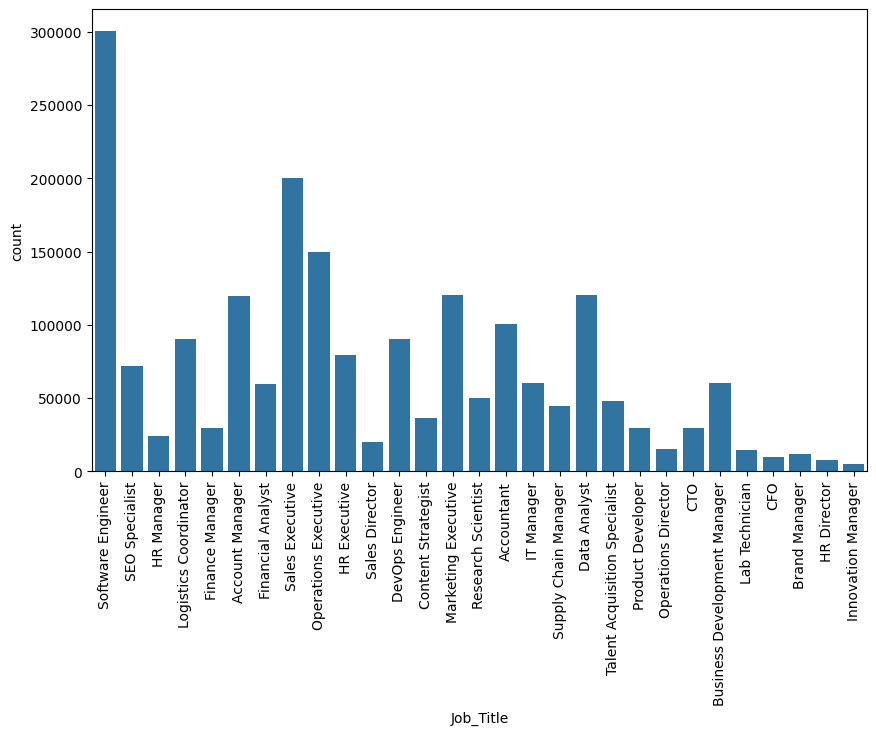

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot( x = 'Job_Title', data = df )

plt.xticks( rotation = 'vertical')

plt.show()

## Q4 What is the average salary by Department?

In [ ]:
dept = df.groupby('Department')['Salary_INR'].mean()/1000

dept

,Salary_INR
Department,
Finance,940.411743
HR,743.853561
IT,1129.858151
Marketing,769.936152
Operations,754.626253
R&D,800.377157
Sales,792.957860


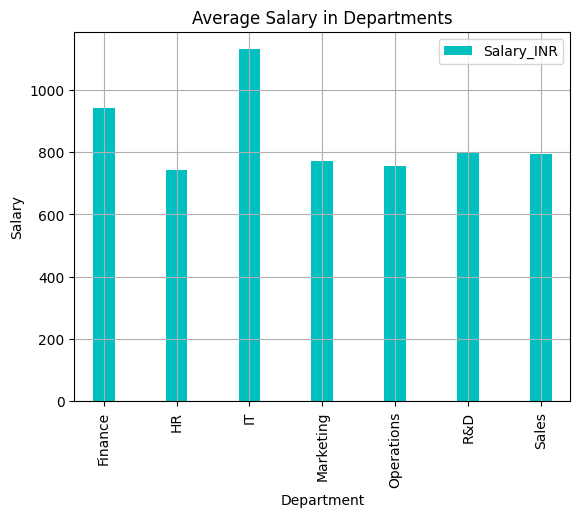

In [ ]:
dept.plot( x = dept.index, y = dept.values, kind = 'bar', color = 'c', legend = True , width = 0.3)

plt.grid()

plt.title("Average Salary in Departments")
plt.ylabel("Salary")

plt.show()

## Q5 Which job title has the highest average salary?

In [ ]:
salary = df.groupby('Job_Title')['Salary_INR'].mean()/1000
salary

,Salary_INR
Job_Title,
Account Manager,799.373734
Accountant,650.076482
Brand Manager,803.127787
Business Development Manager,1252.016231
CFO,795.015873
CTO,801.402754
Content Strategist,800.760030
Data Analyst,800.996380
DevOps Engineer,799.949184


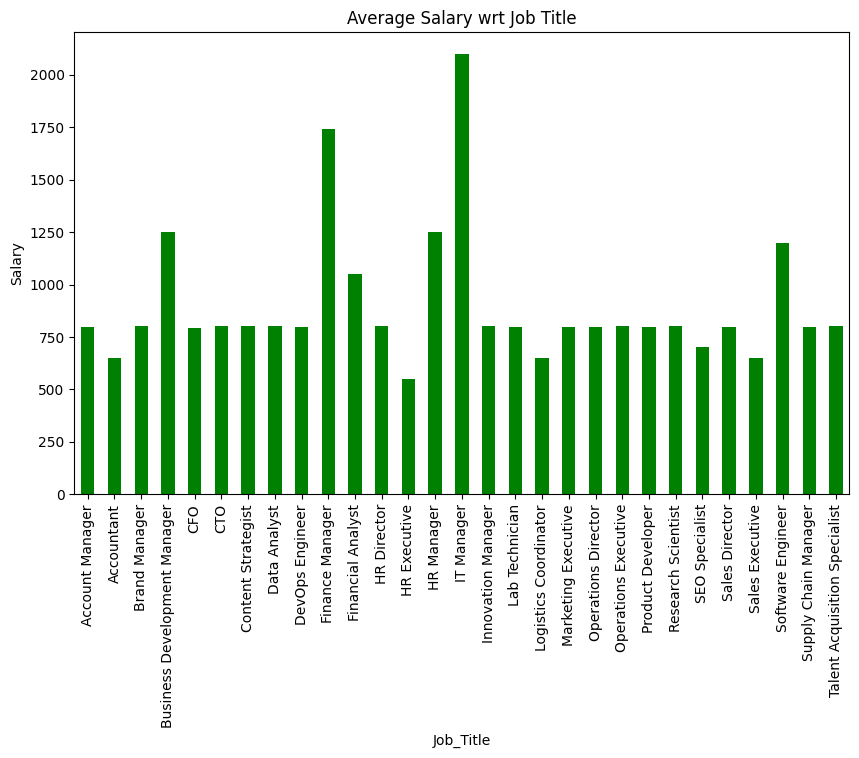

In [ ]:
plt.figure(figsize=(10,6))

salary.plot( x = salary.index, y = salary.values, kind = 'bar', color = 'g')

plt.grid(False)
plt.title("Average Salary wrt Job Title")
plt.ylabel("Salary")

plt.show()

## Q6 What is the average salary in different Departments based on Job Title ?

In [ ]:
dept_job = df.groupby(['Department', 'Job_Title'])['Salary_INR'].mean()/1000

dept_job

Department  Job_Title                    
Finance     Accountant                        650.076482
            CFO                               795.015873
            Finance Manager                  1743.241525
            Financial Analyst                1051.522903
HR          HR Director                       800.694437
            HR Executive                      550.548859
            HR Manager                       1252.401915
            Talent Acquisition Specialist     801.422237
IT          CTO                               801.402754
            Data Analyst                      800.996380
            DevOps Engineer                   799.949184
            IT Manager                       2098.155777
            Software Engineer                1199.260843
Marketing   Brand Manager                     803.127787
            Content Strategist                800.760030
            Marketing Executive               798.780404
            SEO Specialist                    700.456337
Operations  Logistics Coordinator             649.631726
            Operations Director               798.298093
            Operations Executive              800.350915
            Supply Chain Manager              798.168555
R&D         Innovation Manager                801.870103
            Lab Technician                    800.181468
            Product Developer                 798.652261
            Research Scientist                801.314879
Sales       Account Manager                   799.373734
            Business Development Manager     1252.016231
            Sales Director                    799.069374
            Sales Executive                   650.237755
Name: Salary_INR, dtype: float64

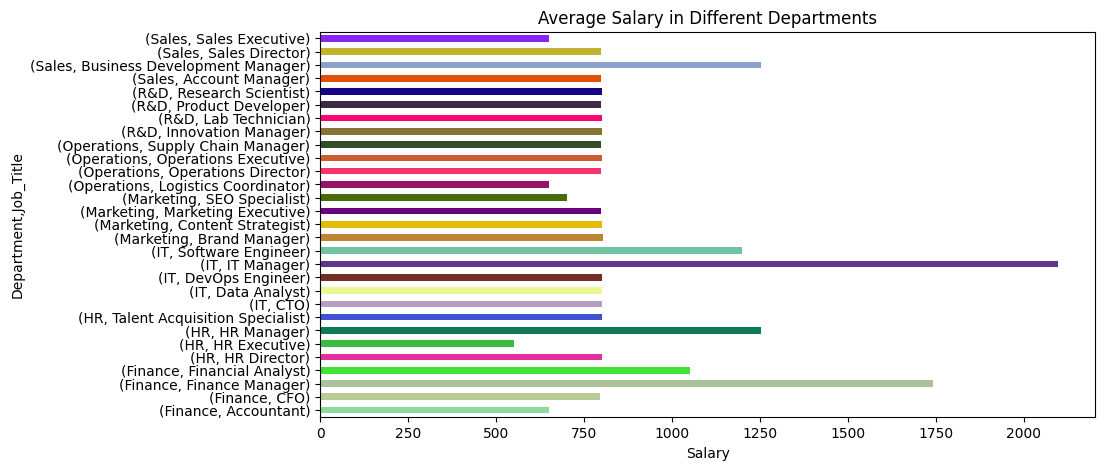

In [ ]:
import random

num_bars = len(dept_job)

random_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(num_bars)]

dept_job.plot( kind = 'barh', figsize = (10,5), color = random_colors)

plt.title('Average Salary in Different Departments')
plt.xlabel("Salary")

plt.savefig('new_chart.png', bbox_inches='tight')

plt.show()

## Q7 How many employees Resigned & Terminated in each department ?


In [ ]:
df.Status.unique()

array(['Resigned', 'Active', 'Terminated', 'Retired'], dtype=object)

In [ ]:
df_Resigned =  df[df['Status'] == 'Resigned']
R_emp = df_Resigned.groupby('Department')['Status'].count()

In [ ]:
df_Terminated =  df[df['Status'] == 'Terminated']
T_emp = df_Terminated.groupby('Department')['Status'].count()

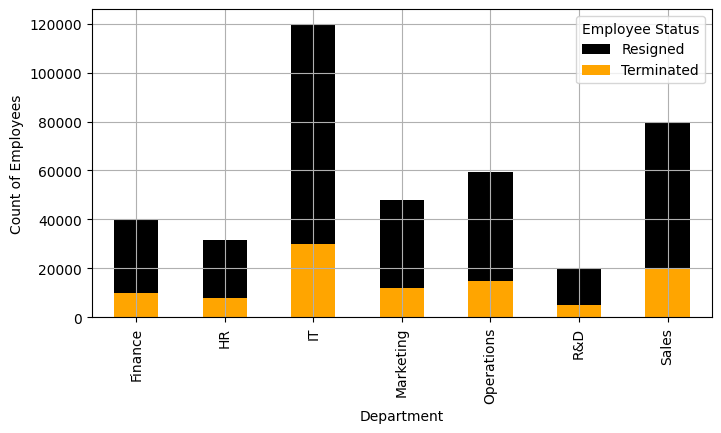

In [ ]:
plt.figure(figsize=(8,4))

R_emp.plot( x = R_emp.index, y = R_emp.values , kind = 'bar', color = 'black', legend = True, label = 'Resigned')

T_emp.plot( x = T_emp.index, y = T_emp.values, kind = 'bar', color = 'orange', legend = True, label = 'Terminated')

plt.legend(title= "Employee Status")
plt.ylabel("Count of Employees")

plt.grid()

plt.show()

## Q8 How does salary vary with years of experience?

In [ ]:
df['Experience_Years'].nunique()

16

In [ ]:
df.groupby('Experience_Years')['Salary_INR'].mean()

,Salary_INR
Experience_Years,
0,896737.454775
1,895903.759824
2,896755.652313
3,896861.245240
4,897944.573965
5,896484.084828
6,896012.632467
7,895722.673960
8,897148.361090


## Q9 What is the average performance rating by department?

In [ ]:
PR = df.groupby('Department')['Performance_Rating'].mean()

PR

,Performance_Rating
Department,
Finance,2.996818
HR,2.995670
IT,2.998216
Marketing,3.004736
Operations,2.996081
R&D,3.001885
Sales,3.006362


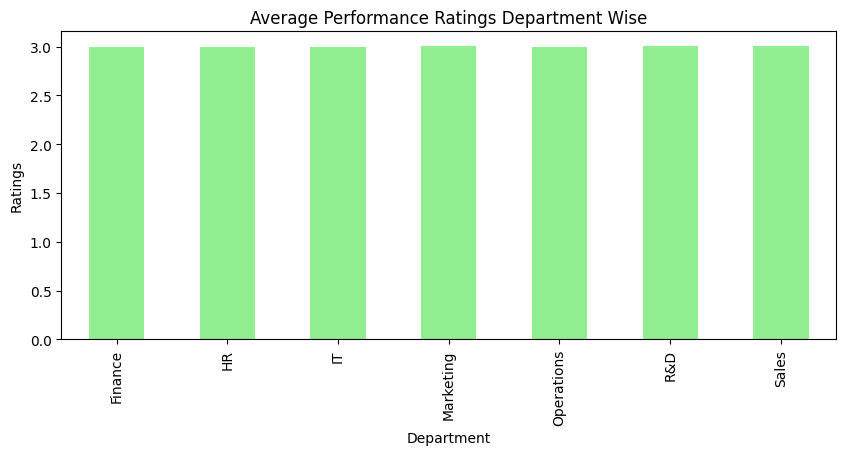

In [ ]:
plt.figure(figsize=(10,4))

PR.plot(x = PR.index, y = PR.values, kind = 'bar', color = 'lightgreen')

plt.title("Average Performance Ratings Department Wise")
plt.ylabel("Ratings")

plt.show()

## Q10 Which Country have the highest concentration of employees?

In [ ]:
df['Country'] = df['Location'].apply( lambda x : str(x.split(',')[1]))

In [ ]:
df

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,Antigua and Barbuda
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,Palestinian Territory
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,2010-08-31,"Casefurt, Serbia",3,14,Active,Remote,657648,Serbia
1999996,EMP1999997,Tracey Smith,IT,Software Engineer,2021-05-07,"Dannyport, Kuwait",3,4,Active,On-site,1030109,Kuwait
1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,2024-05-29,"Craighaven, Nigeria",5,1,Active,Remote,1313085,Nigeria
1999998,EMP1999999,Michael Roberson,IT,Software Engineer,2023-02-14,"Jonathanmouth, Djibouti",4,2,Retired,On-site,1479727,Djibouti


In [ ]:
df.Country.nunique()

243

In [ ]:
df.Country.value_counts()

,count
Country,
Congo,16286
Korea,16285
Sri Lanka,8409
Switzerland,8391
British Virgin Islands,8373
...,...
Indonesia,7983
Kazakhstan,7973
Montenegro,7972


<Axes: xlabel='Country'>

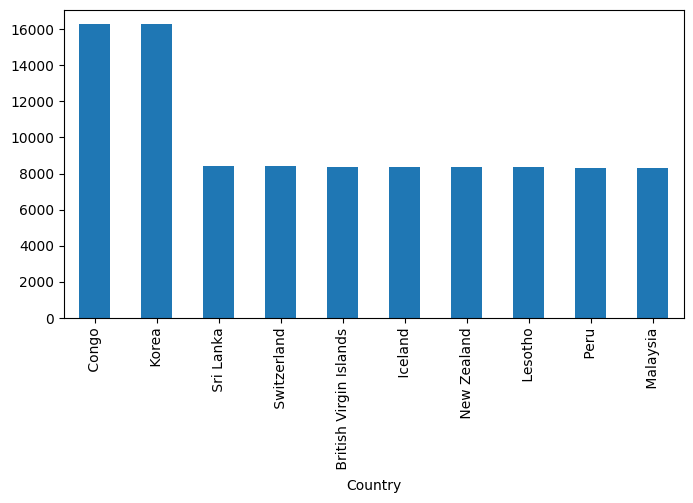

In [ ]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(8,4))

## Q11 Is there a correlation between performance rating and salary?

In [ ]:
df['Performance_Rating'].corr(df['Salary_INR'])

np.float64(-0.00020919799940916458)

In [ ]:
# Alternated Command to show Correlation

df[['Performance_Rating', 'Salary_INR']].corr()

,Performance_Rating,Salary_INR
Performance_Rating,1.000000,-0.000209
Salary_INR,-0.000209,1.000000


A correlation result is −0.0002, which is very close to zero. </p>
- There is no meaningful relationship between an employee’s performance rating and their salary (in INR).
- A correlation of 0 would mean absolutely no linear connection. Your value (−0.0002) is so small that it’s practically the same as zero.
- The negative sign (−) suggests a tiny inverse relationship (higher ratings → slightly lower salaries), but it’s so close to zero that it’s just random noise.

In this dataset, salary and performance rating are essentially unrelated. A higher rating does not mean higher or lower salary in any consistent way.

## Q12 How has the number of hires changed over time (per year)?

In [ ]:
df.Hire_Date.dtype

dtype('<M8[ns]')

In [ ]:
df.insert( 5 , 'Year' , df['Hire_Date'].dt.year)

In [ ]:
df.head()

,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Year,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Country
0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,2011,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,Denmark
1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,2018,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,Costa Rica
2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,2023,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,Saudi Arabia
3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,2023,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,Antigua and Barbuda
4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,2024,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,Palestinian Territory


In [ ]:
df.Year.unique()

array([2011, 2018, 2023, 2024, 2021, 2016, 2020, 2015, 2025, 2022, 2017,
       2019, 2014, 2013, 2012, 2010], dtype=int32)

In [ ]:
df.Year.nunique()

16

In [ ]:
hire = df.groupby('Year')['Employee_ID'].count()

hire

,Employee_ID
Year,
2010,15520
2011,40089
2012,39765
2013,39988
2014,40202
2015,85984
2016,160249
2017,160363
2018,159658


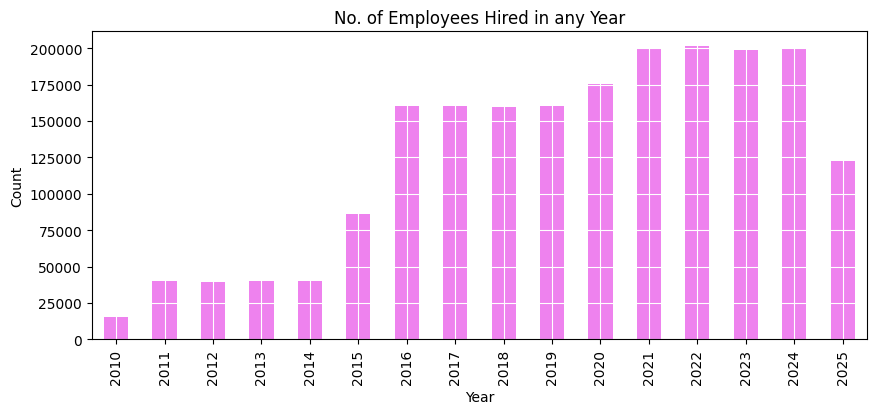

In [ ]:
plt.figure(figsize=(10,4))

hire.plot(x = hire.index, y = hire.values, kind = 'bar', color = 'violet')

plt.grid(True, color = 'w')

plt.title("No. of Employees Hired in any Year")
plt.ylabel("Count")

plt.show()

## Q13 Compare salaries of Remote vs. On-site employees. Is there a significant difference?

In [ ]:
df.groupby('Work_Mode')['Salary_INR'].mean()

,Salary_INR
Work_Mode,
On-site,896835.945792
Remote,896965.326373


## Q14 Find the top 10 employees with the highest salary in each department.

In [ ]:
top_10 = df.groupby('Department').apply(lambda x:x.nlargest(10, "Salary_INR"))

/tmp/ipython-input-1093187349.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
top_10.head(40)


Employee_ID           Full_Name Department  \
Department                                                      
Finance    888712   EMP0888713   Christopher Sloan    Finance   
           695808   EMP0695809        Todd Rodgers    Finance   
           459273   EMP0459274        Angela Payne    Finance   
           750893   EMP0750894           Nina Lara    Finance   
           780290   EMP0780291   Brittany Thompson    Finance   
           1316795  EMP1316796        Larry Wilson    Finance   
           737507   EMP0737508    Alexis Schroeder    Finance   
           781352   EMP0781353         Sarah Jones    Finance   
           803785   EMP0803786       Jose Anderson    Finance   
           905337   EMP0905338  Jennifer Dominguez    Finance   
HR         223845   EMP0223846         Ethan Jones         HR   
           1068270  EMP1068271         Austin Hall         HR   
           1541972  EMP1541973       Daniel Wilson         HR   
           1861401  EMP1861402      Amanda Everett         HR   
           553718   EMP0553719     Michelle Snyder         HR   
           674999   EMP0675000     Andre Velasquez         HR   
           230232   EMP0230233        Carrie Davis         HR   
           1489953  EMP1489954     Gregory Pearson         HR   
           1863268  EMP1863269    Dr. Shawn Gibson         HR   
           1708267  EMP1708268          Anna Munoz         HR   
IT         1697605  EMP1697606       Kathryn Owens         IT   
           1284141  EMP1284142       Robert Bowman         IT   
           1912378  EMP1912379   Christina Delgado         IT   
           1904593  EMP1904594        Donald Cohen         IT   
           645146   EMP0645147   Brandon Rodriguez         IT   
           766571   EMP0766572  Dr. David Mitchell         IT   
           1257897  EMP1257898   Cassandra Morales         IT   
           1734354  EMP1734355        Debra Rivera         IT   
           369339   EMP0369340        Douglas Mann         IT   
           1645827  EMP1645828   Jennifer Reynolds         IT   
Marketing  1268998  EMP1268999         Shannon Fox  Marketing   
           1015129  EMP1015130         Laura Allen  Marketing   
           1214216  EMP1214217      Rebecca Davies  Marketing   
           373011   EMP0373012         Dylan Davis  Marketing   
           158254   EMP0158255          Jamie Carr  Marketing   
           1848468  EMP1848469         Lisa Warren  Marketing   
           814806   EMP0814807        Daniel Cline  Marketing   
           1117910  EMP1117911         Tyler Fritz  Marketing   
           1062763  EMP1062764         John Howard  Marketing   
           1468982  EMP1468983      Russell Parker  Marketing   

                              Job_Title  Hire_Date  Year  \
Department                                                 
Finance    888712       Finance Manager 2011-07-19  2011   
           695808       Finance Manager 2019-12-27  2019   
           459273       Finance Manager 2021-08-12  2021   
           750893       Finance Manager 2021-10-19  2021   
           780290       Finance Manager 2021-07-23  2021   
           1316795      Finance Manager 2015-01-30  2015   
           737507       Finance Manager 2024-10-28  2024   
           781352       Finance Manager 2018-04-02  2018   
           803785       Finance Manager 2020-11-17  2020   
           905337       Finance Manager 2018-03-22  2018   
HR         223845            HR Manager 2021-03-09  2021   
           1068270           HR Manager 2017-10-04  2017   
           1541972           HR Manager 2025-04-18  2025   
           1861401           HR Manager 2010-09-29  2010   
           553718            HR Manager 2018-04-06  2018   
           674999            HR Manager 2021-08-03  2021   
           230232            HR Manager 2025-05-30  2025   
           1489953           HR Manager 2022-03-06  2022   
           1863268           HR Manager 2022-05-13  2022   
           1708267          

## Q15 Identify departments with the highest attrition rate (Resigned %)

In [ ]:
dept_counts = df.groupby('Department')['Status'].agg(total_emp = 'count', resigned = lambda x: (x == 'Resigned').sum())

dept_counts

,total_emp,resigned
Department,,
Finance,199873,40238
HR,159119,31736
IT,601042,119852
Marketing,240081,47793
Operations,300095,59397
R&D,99759,19919
Sales,400031,79725


In [ ]:
# Calculate attrition rate

dept_counts['attrition_rate_%'] = (dept_counts['resigned'] / dept_counts['total_emp']) * 100

In [ ]:
dept_counts

,total_emp,resigned,attrition_rate_%
Department,,,
Finance,199873,40238,20.131784
HR,159119,31736,19.944821
IT,601042,119852,19.940703
Marketing,240081,47793,19.907031
Operations,300095,59397,19.792732
R&D,99759,19919,19.967121
Sales,400031,79725,19.929705


In [ ]:
# Sort by attrition rate (highest first)

dept_counts.sort_values("attrition_rate_%", ascending = False)

,total_emp,resigned,attrition_rate_%
Department,,,
Finance,199873,40238,20.131784
R&D,99759,19919,19.967121
HR,159119,31736,19.944821
IT,601042,119852,19.940703
Sales,400031,79725,19.929705
Marketing,240081,47793,19.907031
Operations,300095,59397,19.792732
